# Matplotlib
## A powerful and versatile plotting library for Python

Generating complex arrays full of data using NumPy (for example) is only useful if we have tools to interpret that data. Humans are not good at seeing patterns in huge lists or tables of values, but we can very quickly interpret the same data presented graphically. This is why it is so important to be able to plot data in Python. The fundamental plotting library is called Matplotlib and a module within that package called Pyplot. In this session we will explore Matplotlib, learn how it works and start to present our n-dimensional arrays in publication-quality figures.

<img src="surfaceplot1.png">

<i>Image from https://python-graph-gallery.com/371-surface-plot/ </i>

## 1 Matplotlib Basics

Firstly, a warning that mastering Matplotlib can sometimes be frustrating - the library of available functions is huge, the code itself is huge and it can interface with several different modes of operation, backends and styles. It is also rapidly evolving, thanks to a large and productive development community, which means the documentation is not always totally up to date. However, it is worth putting in the time and effort to overcome these minor hurdles as Matplotlib is an extremely powerful and flexible plotting library and it forms the basis of many other high-level packages for Python. In this spirit, we should start with the basics and ensure we have a firm grasp of the fundamental concepts underpinning Matplotlib.


### 1.1 The Matplotlib Object Heirarchy

Graphics created by Matplotlib are actually a set of nested Python objects, like a Russian doll. The outermost container is known as the Figure. Inside the Figure there are Axes. One point of confusion is that axes are not the orthogonal x,y,z markers that we commonly refer to as axes (i.e. the plural of axis), but instead refer to an individual frame or image within the Figure object. You can think of ech Axes being an individual graph, and several Axes can be presented in a single Figure.

Each of the Axes then has smaller objects associated with it, such as tick marks, text, labels, lines, legends, points, titles, etc. Each of these components is a discrete Python object tied to one of the Axes and a Figure. Each object can be manipulated and configured individually to create the final graphic.
<br>
<img src="objectHeirarchy.png">
<i>Figure 2: A schematic showing the object heirarchy within Matplotlib. The outer layer is the Figure (red), which contains within it Axes (blue), which in turn contain smaller objects (green). Image from https://realpython.com/python-matplotlib-guide/ </i>
<br>
<br>

### 1.2 Terminology

Once we understanding that there are several layers of object that interact to form a Matplotlib graphic, we then need to know some fundamental terminology in order to keep a mental track of our place in the object heirarchy when working with particular objects. We can think of this as the "anatomy" of a Matplotlib graphic. In Fig 3, there is one Figure containing one Axes, and the lower level objects are identified with blue circles.

<img src="mpl_anatomy.png">
<br>
<br>
<i>Figure 3: Anatomy of a Matplotlib graphic, from the mpl documentation https://matplotlib.org/3.1.1/tutorials/introductory/usage.html </i>

### 1.3 Object heirarchy in action

We can then think about creating a basic plot by traversing the heirarchical levels. First, let's create two axes on a single plot...

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(15, 8))


We can see that two Axes have been generated in a single Figure. If we explore a little, we will see that the figure is a single object. The Axes belong to the object (fig.axes). Individual Axes can be accessed by indexing into fig.

In [2]:
print("querying fig")
print(fig)
print()

print("querying fig.axes")
print(fig.axes)
print()

print("querying fig.axes[0]")
print(fig.axes[0])


querying fig
Figure(1500x800)

querying fig.axes
[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5583d3410>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fc5440d7f50>]

querying fig.axes[0]
AxesSubplot(0.125,0.11;0.352273x0.77)


We can then start adding low level objects to each of the Axes...

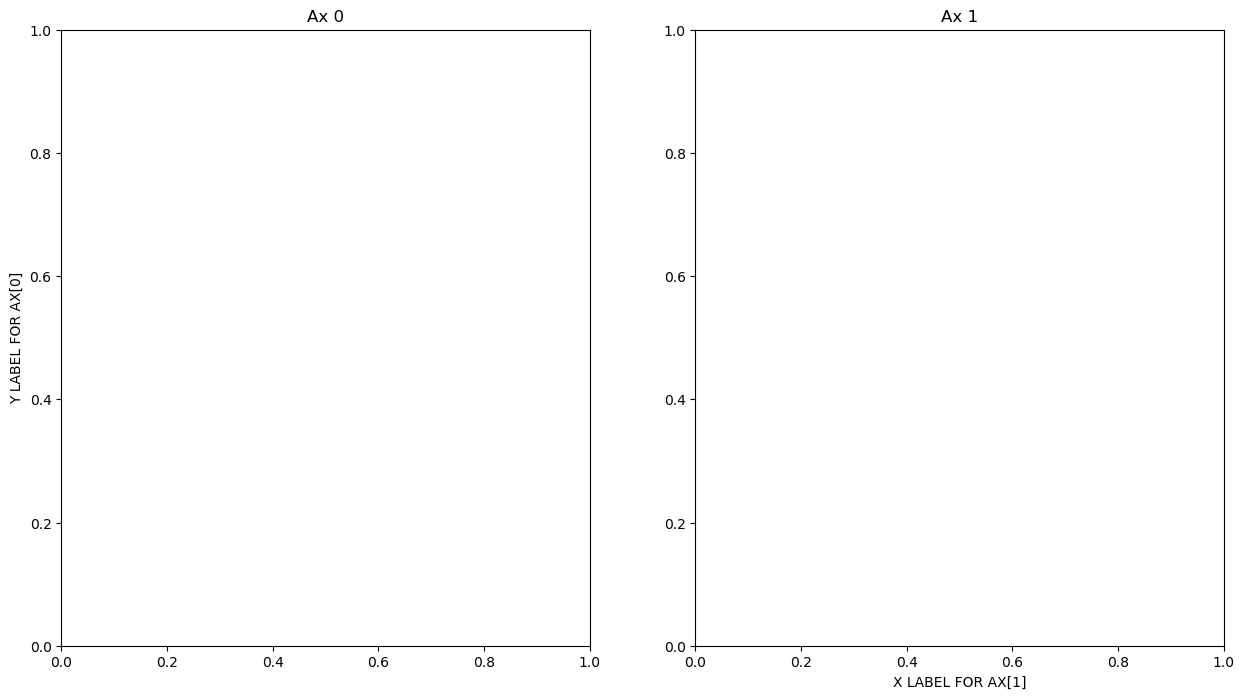

In [3]:
fig.axes[0].set_title("Ax 0") #set title for ax0
fig.axes[1].set_title("Ax 1") # set title for ax1

fig.axes[0].set_ylabel("Y LABEL FOR AX[0]") # set y label on ax0 only
fig.axes[1].set_xlabel("X LABEL FOR AX[1]") #set x label for ax1 only
fig #display figure

These operations can be thought of as designing the canvas upon which we will plot our data. We can do this by assigning arrays to each of the Axes in the Figure. There are then low level objects to manipulate in order to configure how that array is presented.

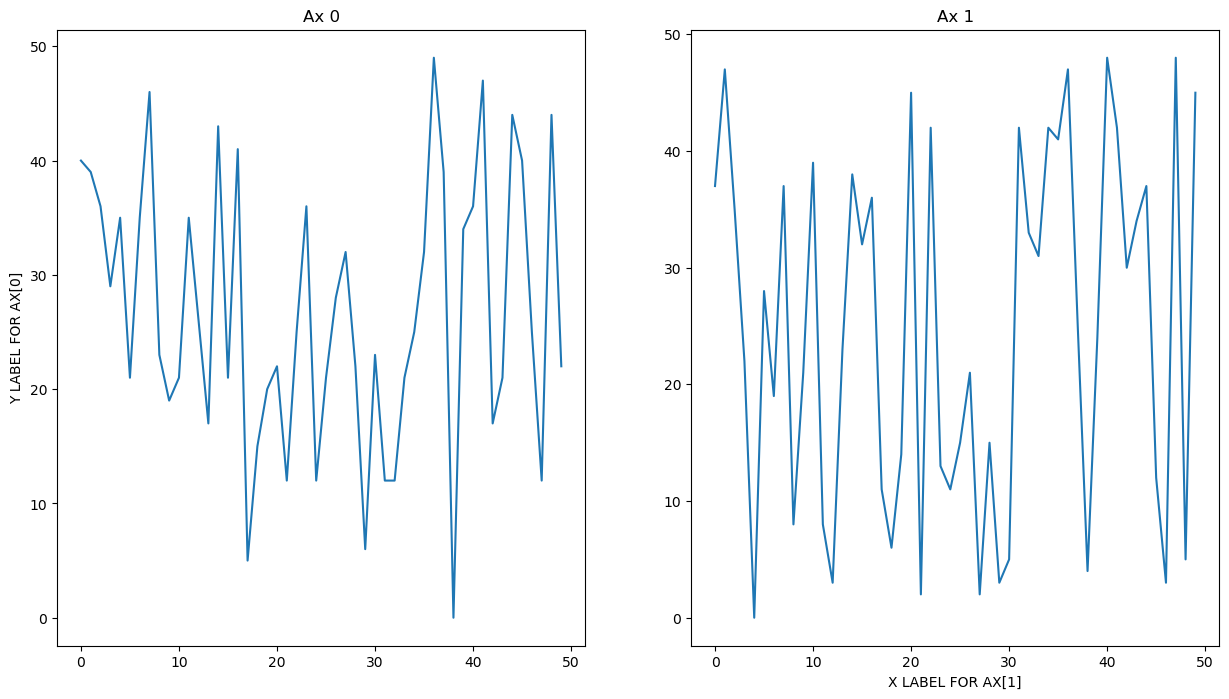

In [4]:
import numpy as np

X = np.random.randint(50,size=(50))
Y = np.random.randint(50,size=(50)) # generate two random 1D arrays, 100 elements in length

ax[0].plot(X)   # plot X on ax[0]
ax[1].plot(Y)   # plot Y on ax[1]

fig

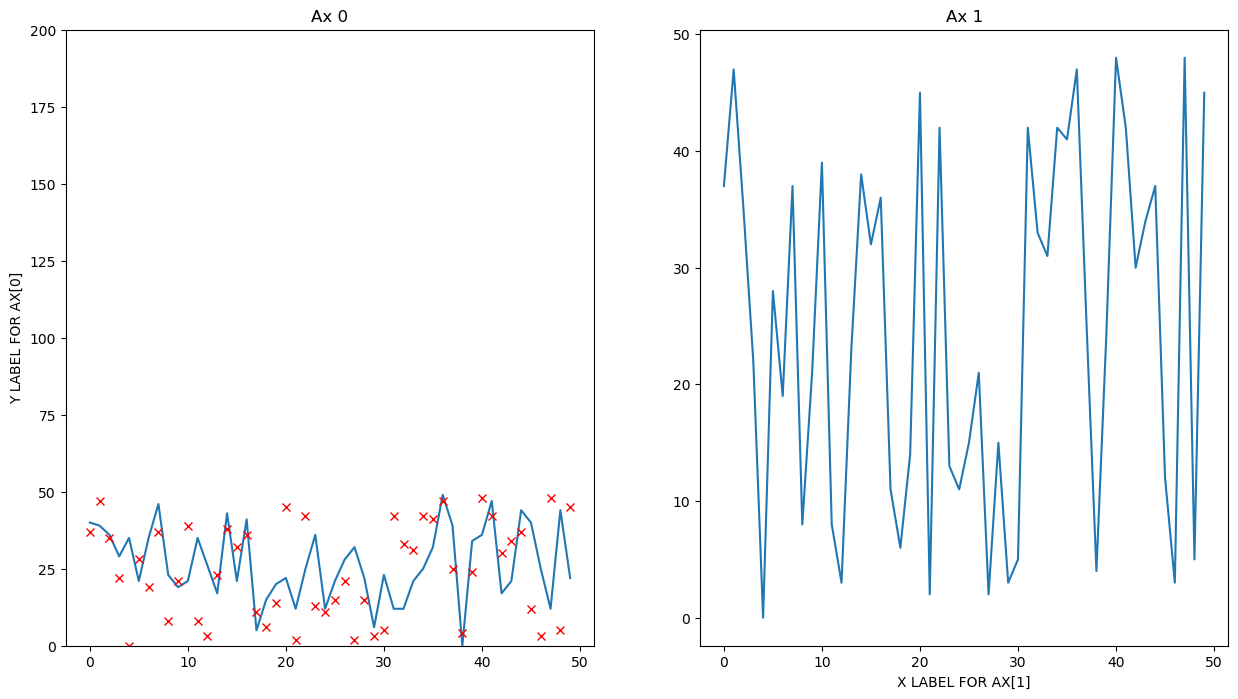

In [5]:
ax[0].plot(Y,'rx')# add Y to ax[0] but plotted as red x's instead of as a line
ax[0].set_ylim(0,200) #change y axis range
fig   # display figure

## 2 State Machine vs Stateless (Object Oriented)

### 2.1 stateful and stateless plotting

The heirarchy of objects described above allows us to manipulate every component of a graphic individually and with precision. It is a very powerful approach, particularly when our projects become complex and we need to handle multiple complex figures with multiple Axes and a wide range of attributes. We can think of this as the <b><i>"object oriented"</i></b> approach to Matplotlib, since we are directly interacting with the Figure, Axes and low level objects comprising the graphic.

There is an alternative approach to plotting in Matplotlib that relies upon Matplotlib tracking the current active object. The benefit of this is that the plotting syntax is simplified and should feel familiar to Matlab users. Much of the object creation is handled by matplotlib without needing to be explicitly defined by the user. This is known as the "state-machine" approach. In reality, the state-machine approach is a set of wrappers around the object-oriented methods that call the active Figure and Axes objects rather than having them explicitly defined in each line of code. This makes for easier and more convenient, but arguably less tractable and less versatile plotting.

We can imagine that the state-machine ("stateful") approach relies on Matplotlib knowing the current "state" of the project, meaning the Figure and Axes that are currently being worked on. The object-oriented ("stateless") approach does not rely upon Matplotlib having any particular state, as the Figure and Axes are explicitly defined in each line of code.

For example, plotting our array X is as simple as:

Text(0.5, 1.0, 'LINE PLOT EXAMPLE')

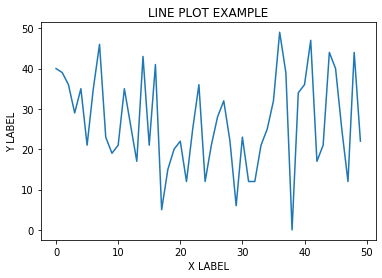

In [6]:
plt.plot(X)
plt.xlabel("X LABEL")
plt.ylabel("Y LABEL")
plt.title("LINE PLOT EXAMPLE")

Text(0.5, 1.0, 'SCATTERPLOT EXAMPLE')

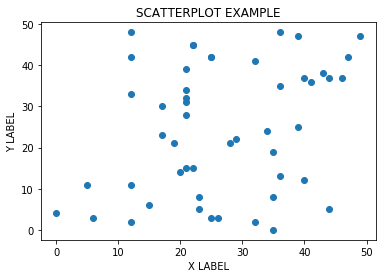

In [7]:
plt.scatter(X,Y)
plt.xlabel("X LABEL")
plt.ylabel("Y LABEL")
plt.title("SCATTERPLOT EXAMPLE")

The stateful approach sometimes has different syntax to the stateless approach. In most cases the syntax is simplified for the stateful approach, for example to adjust the label on the y-axis...

stateful
<code>
plt.ylabel("Y LABEL")
</code>

stateless
<code>
ax[0].set_ylabel("Y LABEL")
</code>

## 2.2 stateful plotting as a series of wrappers

In section 2.1 stateful plotting was described as a series of wrappers around stateless plotting functions, but what does this actually mean?

A wrapper is a small amount of code that interacts with more code that the user doesn't have to see. For example, here is a function:

<code>def inner(X):
    return X*Y
</code>


and here is that function inside a wrapper:

<code>def wrapper(X):
    def inner(X):
        return X*Y
    return inner(X)
</code>

if we call wrapper(X) we are actually running inner(X) but without having to interact with it directly.


In [8]:
# in this executable version we add a print statement to show that calling wrapper() also runs inner()
def wrapper(X):
    print("running wrapper()")
    def inner(X):
        print("running inner()")
        return X*2
    return inner(X)

X = 5
result = wrapper(X)
result

running wrapper()
running inner()


10

If we look under the hood of plt.plot(), we find the following code:

<code>def plot(*args, **kwargs):
    """An abridged version of plt.plot()."""
    ax = plt.gca()
    return ax.plot(*args, **kwargs)</code>
<br>
<br>
<code>def gca(**kwargs):
    """Get the current Axes of the current Figure."""
    return plt.gcf().gca(**kwargs)
</code>

So a call to plt.plot is actuall a call to a wrapper that in turn runs <code>plt.gca()</code>. This is the second function defined in the previous cell, and it is itself wrapping a call to <code>plt.gcf()</code>. This stands for "get current figure" and gca stands for "get current axes". 

gcf returns fig <br>
gca returns ax

so <code>plt.plot(X)</code> is actually <code>fig.ax.plot(X)</code> which you should recognise as the stateless approach to plotting X.

Exploring the code underlying other pyplot functions such as plt.grid(), plt.legend(), plt.yabel(), plt.xlabel() etc shows that these methods are also wrappers that use gca() to identify the current active Axes object and call a method on that object.

Slightly confusingly, the object oriented approach to plotting using multiple Axes object requires a call to plt.subplots(). By default this creates an object with one row and one column, i.e. a single panel plot. However, we can instantiate as many subplots as we like by providing nrows = x and ncols = y.

## 3 Backends and Styles

### 3.1 Backends

Matplotlib's "frontend" is the code that the user interfaces with. The "backend" is what actually renders the plot to create a graphic. The backend has to be correctly configured to enable plotting in different environments, for example interactive plotting in Jupyter notebooks or for rapid data analyss. A different backend is required for embedding Matplotlib graphics into GUI's or web applications, and another is required for saving post-script images.

The Matplotlib backends are divided into two types - interactive backends and hardcopy backends. The interactive backends are used to create plots that can be manipulated after creation by the user, for example for embedding in web apps. Hardcopy backends are used to generate image files.

A good basic backend is already set by default on installing Matplotlib. Changing the backend can be achieved in several ways:


1) Update backend parameter in matplotlibrc file 
<br>
<br>
<code>backend : WXAgg   # use wxpython with antigrain (agg) rendering</code>
<br>
<br>
2) Set the MPLBACKEND environment variable, either for your current shell or for a single script.
<br>
<br>
On Unix:<br>
<code> export MPLBACKEND=module://my_backend
python simple_plot.py</code>
<br>
<br>
On Windows:<br>
<code> set MPLBACKEND=module://my_backend
python simple_plot.py</code>
<br>
<br>
3) Set backend with the use() function in-script
<br>
<code>import matplotlib
matplotlib.use('PS')   # generate postscript output by default
</code>
<br>
<br>
It can sometimes be useful, especially when working in complex projects that generate multiple plots across many scripts, to turn interactive plotting on and off. An example might be where several intermediate plots are saved to hard disk by a script and overplotting each one in an interactive plotting window slows down or even crashes Python.
To toggle interactive plotting on and off, the following command can be included after the import statement:

<code>plt.ion() # interactive plotting on</code><br>
<code>plt.ioff() # interactive plotting off</code>

The default backend will be sufficient for all the work we are doing in this course - especially because we are working primarily in Jupyter notebooks and therefore require interactive plotting, but if any of your own projects require backend adjustments, there is much more information about the various backends in the Matplotlib docs: https://matplotlib.org/3.1.1/tutorials/introductory/usage.html



### Styles

Setting a Matplotlib style is a quick way to customise the appearance of the graphic. The style sheet configures the default colourscheme, line widths, fonts, spacing, layout and other properties that change the overall aesthetic without changing the content of the plot. The default style is a good one - simple, straightforward design that works wel for publications. Other popular styles include "ggplot" which is designed to mimic the aesthetic of the popular R plotting library GGPlot.

The style can be changed using the following syntax after the matplotlib import statement:

<code>mpl.style.use("ggplot")</code>e figure below shows the same graphics repeated using a selection of different Matplotlib style sheets. There are more available here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html along with the code used to enerate the plots.
<br>
<br>
<img src="MPL_StyleGuide.png">

## 4 Saving Figures

### 4.1 Savefig()

Figures can be saved to hard disk simply by using the savefig() function. In stateful mode, this is achieved using plt.savefig() to save the current figure, or in stateless mode fig.savefig() to save the figure "fig". Savefig takes the filename and path as one argument. The file type is set by providing an extension to the filename. For example:
<br>
<br>
<code>plt.savefig("/home/User/Desktop/Figure1.jpg") #save .jpeg file to desktop</code>
<br>
<br>
<code>fig.savefig("/home/User/Documents/Figure1.png") # save .png file to Documents </code>
<br>
<br>
<code>fig.savefig("/home/User/Desktop/Figure1.tif") # save .tif file to desktop </code>
<br>

### 4.2 Resolution
The resolution of the saved grahic can be set simply by providing a "dpi" (dots per inch) argument to savefig(). A standard resolution figure could be 150 dpi, a full resolution, publication-ready figure might be 300 dpi.
<br>
<br>
<code> plt.savefig("/home/User/Desktop/Figure1.png",dpi=150)</code>
<br>
<br>
<code> fig.savefig("/home/User/Desktop/HighResFigure1.png, dpi=300)</code>
<br>

## 5 Layout

### 5.1 arranging subplots
<br>
The layout of a Matplotlib graphic can be controlled directly, or by using Matplotlib shortcuts. Using the stateless approach, we can define a Figure with several Axes and adjust their relative positions:


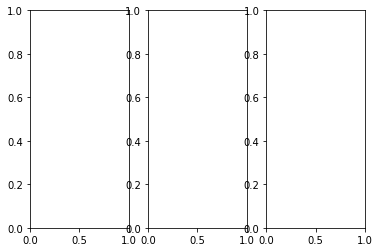

In [9]:
# first we can decide that we want 3 Axes on our Figure, and organise them into rows and columns as we like...

fig, (ax1,ax2,ax3) = plt.subplots(1,3) # in this example we have created one rwo, three columns

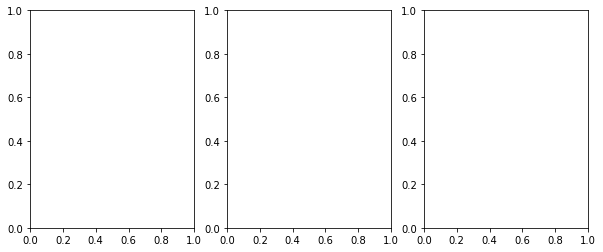

In [10]:
# The plot is a bit small, so we can set the figsize

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))

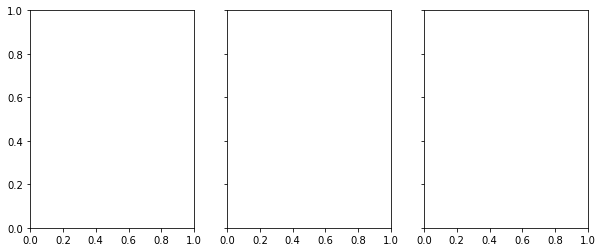

In [11]:
# If we are plotting similar data on all three axes we can choose to declutter by sharing the y axis between them

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True)

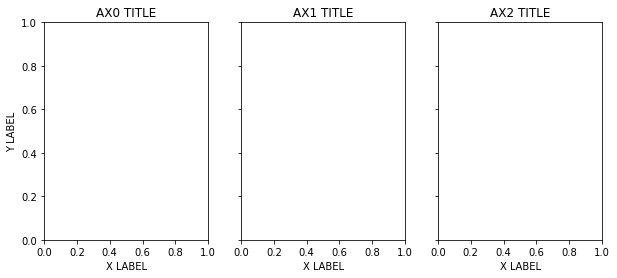

In [12]:
# We can also provide a title and axis labels for each individual subplot

ax1.set_title("AX0 TITLE")
ax1.set_ylabel("Y LABEL")
ax1.set_xlabel("X LABEL")

ax2.set_title("AX1 TITLE")
ax2.set_xlabel("X LABEL")

ax3.set_title("AX2 TITLE")
ax3.set_xlabel("X LABEL")
fig

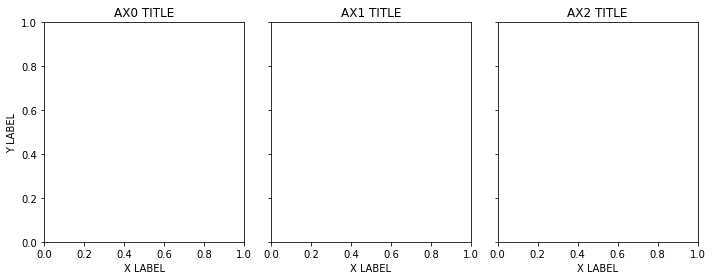

In [13]:
# Matplotlib also offers a tight_layout() function that automatically positions objects for neat plotting
fig.tight_layout()
fig

### 5.2 subplot2grid

There are also more advanced options for more control over subplot shapes, sizes and positions available using the matplotlib functions GridSpec(), SubplotSpec() and subplot2grid(). The basic idea is to set the dimensions of a grid in rows and columns, then specify the location and size of each Axes object as coordinates on that grid.

For example, using subplot2grid() we can define a 3 x 3 grid and add two subplots vertically as follows:

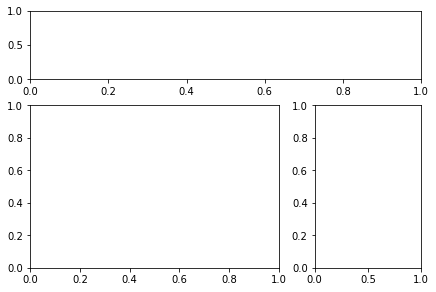

In [14]:
import matplotlib.pyplot as plt
import numpy as np

ax1 = plt.subplot2grid((3, 3), (0, 0),colspan=3, rowspan=1) # wide, short subplot
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2, rowspan = 2) # wide, tall subplot
ax3 = plt.subplot2grid((3,3),(1,2),colspan=1, rowspan = 2) # short, narrow subplot
plt.tight_layout(pad=0.5) # add whitespace between Axes

Then we simply add data to each Axes object

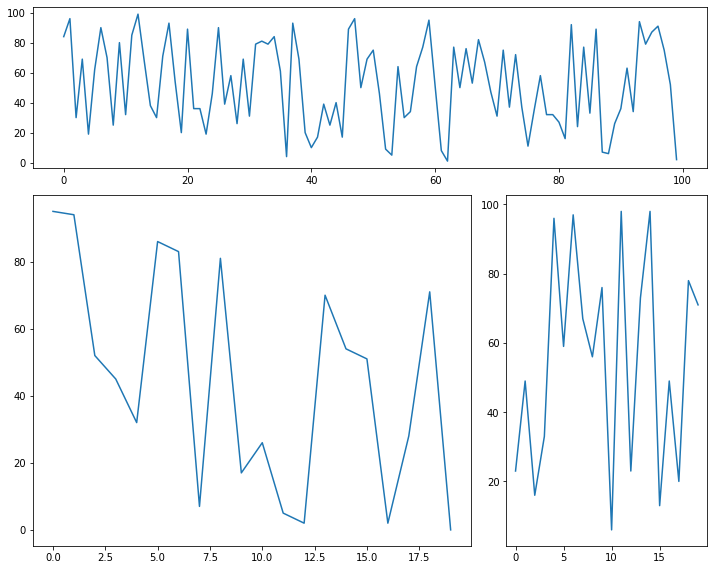

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((3, 3), (0, 0),colspan=3, rowspan=1) # wide, short subplot
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2, rowspan = 2) # wide, tall subplot
ax3 = plt.subplot2grid((3,3),(1,2),colspan=1, rowspan = 2) # short, narrow subplot
X = np.random.randint(100,size=100)
Y = np.random.randint(100,size=20)
Z = np.random.randint(100,size=20)

ax1.plot(X)
ax2.plot(Y)
ax3.plot(Z)

plt.tight_layout(pad=1)

### 5.3 Subplot2grid as a wrapper to GridSpec

Like ply.plot(), Subplot2grid() is a wrapper around a lower level function, in this case GridSpec. Also, like plt.plot() using the lower level function offers more control and a greate rdegree of flexibility in manipulating the graphic, whereas the higher level function offers ease of use.

Calling <code>ax = plt.subplot2grid((3, 2), (0, 0))</code> is equivalent to the following GridSpec code:
<br>
<code>
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 2)
ax = plt.subplot(gs[0, 0])
</code>
<br>
<br>
So Subplot2grid defines a gridspec object and parses that to pyplot as a subplot object. However, we can also go directly to GridSpec and start varying more variables and making our graphics perfect! We start by defining a gridspec object (named gs) that defines the grid shape. We can then use gs.update() to adjust the position of each Axes object in the Figure.
<br>

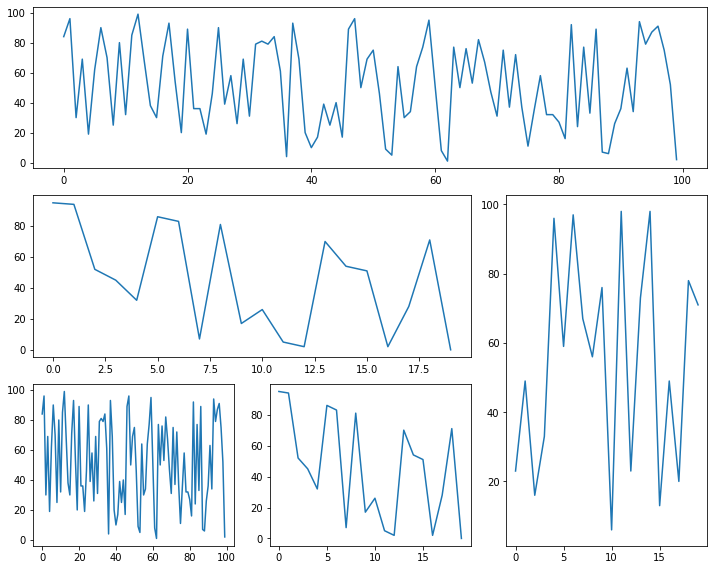

In [16]:
# Start with a single gridspec object

import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,8))

gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])

ax1.plot(X)
ax2.plot(Y)
ax3.plot(Z)
ax4.plot(X)
ax5.plot(Y)

plt.tight_layout(pad=1)

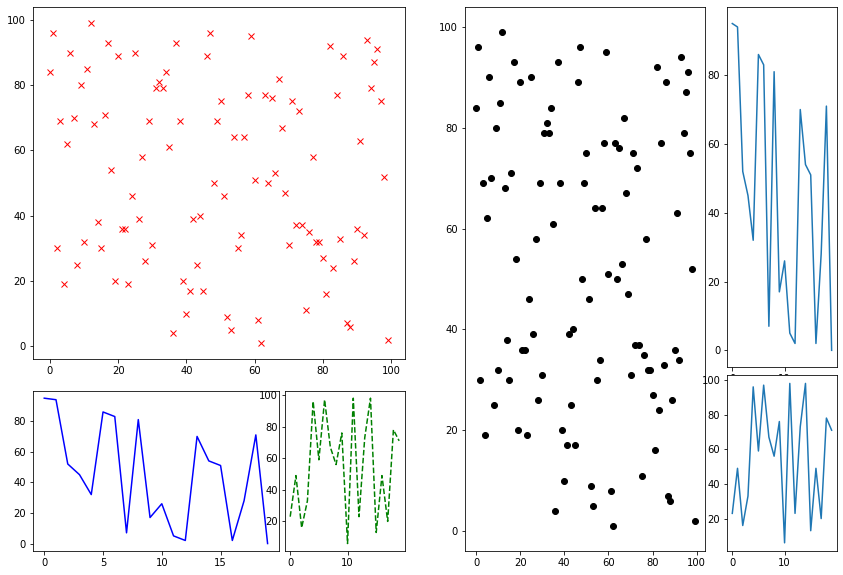

In [17]:
# Now use gs.update() to define multiple gridspec objects
fig = plt.figure(figsize=(12,10))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = plt.subplot(gs1[:-1, :])
ax2 = plt.subplot(gs1[-1, :-1])
ax3 = plt.subplot(gs1[-1, -1])

gs2 = gridspec.GridSpec(3, 3)
gs2.update(left=0.55, right=0.98, hspace=0.05)
ax4 = plt.subplot(gs2[:, :-1])
ax5 = plt.subplot(gs2[:-1, -1])
ax6 = plt.subplot(gs2[-1, -1])

ax1.plot(X, 'rx')
ax2.plot(Y, 'b')
ax3.plot(Z, 'g--')
ax4.plot(X, 'ko')
ax5.plot(Y)
ax6.plot(Z)


## 6 Types of Plot
### In this section we will get our hands dirty with 1, 2 and 3 dimensional plots, using what we have learned about Matplotlib

### 6.1 1D plots

### 6.1.1 Single panel line and scatter plots

Text(0, 0.5, 'YLABEL')

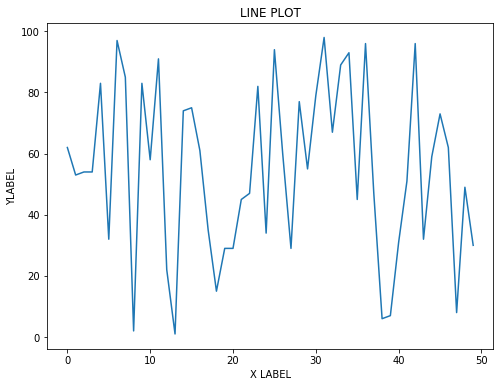

In [18]:
X = np.random.randint(100,size=(50))

plt.figure(figsize=(8,6))
plt.plot(X)
plt.title("LINE PLOT")
plt.xlabel("X LABEL")
plt.ylabel("YLABEL")

Text(0, 0.5, 'YLABEL')

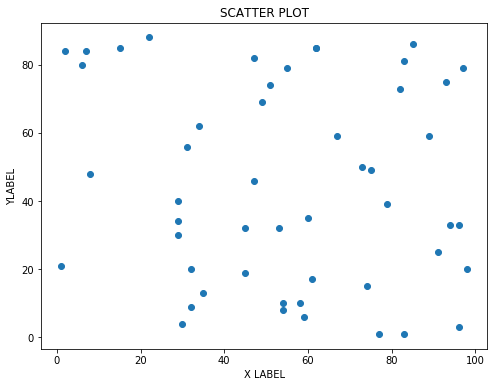

In [19]:
Y = np.random.randint(100,size=(50))

plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.title("SCATTER PLOT")
plt.xlabel("X LABEL")
plt.ylabel("YLABEL")

(Text(0.5, 0, 'X LABEL'), Text(0, 0.5, 'YLABEL'))

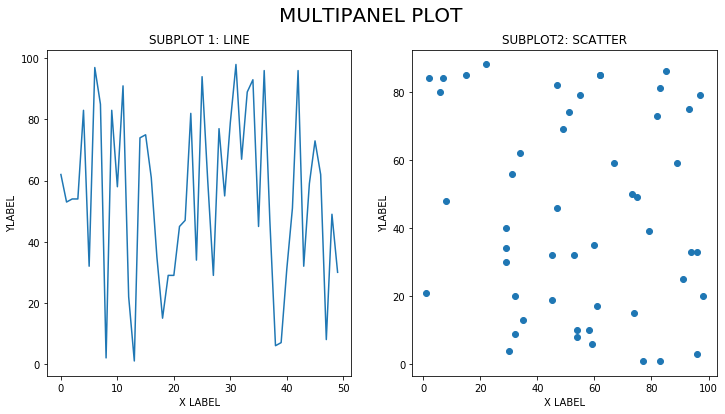

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("MULTIPANEL PLOT",fontsize=20)
ax[0].plot(X), ax[0].set_title("SUBPLOT 1: LINE")
ax[1].scatter(X,Y), ax[1].set_title("SUBPLOT2: SCATTER")

ax[0].set_xlabel("X LABEL"),ax[0].set_ylabel("YLABEL")
ax[1].set_xlabel("X LABEL"),ax[1].set_ylabel("YLABEL")

### 6.1.2 Multipanel line and scatter plots

Text(0.5, 0, 'X LABEL')

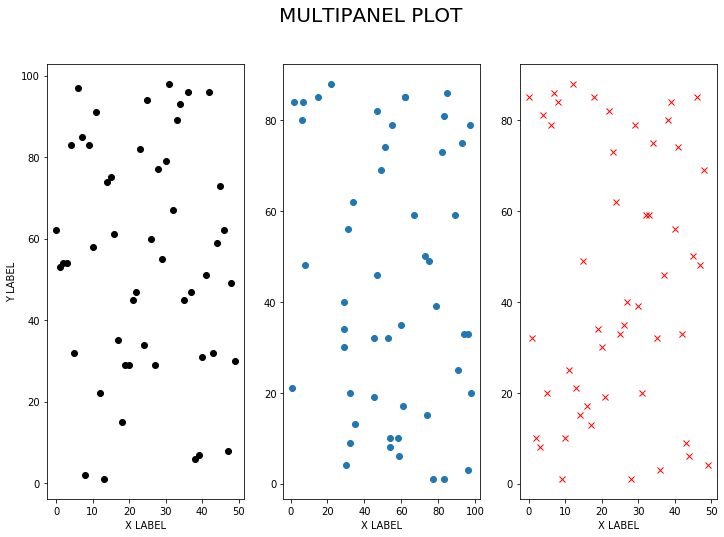

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
fig.suptitle("MULTIPANEL PLOT",fontsize=20)
ax1.plot(X,'ko')
ax1.set_xlabel("X LABEL"), ax1.set_ylabel("Y LABEL")

ax2.scatter(X,Y)
ax2.set_xlabel("X LABEL")

ax3.plot(Y,'rx')
ax3.set_xlabel("X LABEL")

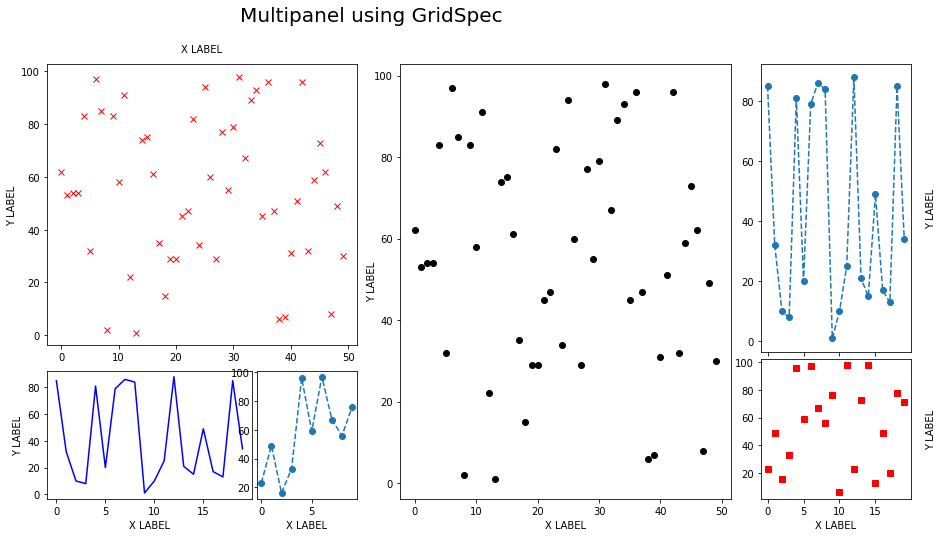

In [22]:

# define figure object and add figure title
fig = plt.figure(figsize=(10,8))
plt.suptitle("Multipanel using GridSpec", fontsize=20)

# define grid and update it under two variables
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)
gs2 = gridspec.GridSpec(3, 3)
gs2.update(left=0.54, right=1.25, hspace=0.05)

# create 6 Axes objects inside fig
ax1 = plt.subplot(gs1[:-1, :]) # ax1 position and size (index = all columns in gs1, )
ax1.set_ylabel("Y LABEL"), ax1.set_xlabel("X LABEL") # set x and y labels
ax2 = plt.subplot(gs1[-1, :-1])
ax2.set_ylabel("Y LABEL"), ax2.set_xlabel("X LABEL")
ax3 = plt.subplot(gs1[-1, -1])
ax3.set_xlabel("X LABEL")
ax4 = plt.subplot(gs2[:, :-1])
ax4.set_ylabel("Y LABEL"), ax4.set_xlabel("X LABEL")
ax5 = plt.subplot(gs2[:-1, -1])
ax5.set_ylabel("Y LABEL"), ax5.set_xlabel("X LABEL")
ax5.yaxis.set_label_position("right")
ax6 = plt.subplot(gs2[-1, -1])
ax6.set_ylabel("Y LABEL"), ax6.set_xlabel("X LABEL")
ax6.yaxis.set_label_position("right")

# adjust x and y label positions for clarity using coordinates
ax1.xaxis.set_label_coords(0.5,1.07)
ax4.yaxis.set_label_coords(-0.07,0.5)
ax5.yaxis.set_label_coords(1.1,0.5)
ax6.yaxis.set_label_coords(1.1,0.5)

# add data to axes objects
ax1.plot(X, 'rx')
ax2.plot(Y[0:20], 'b')
ax3.plot(Z[0:10], 'o--')
ax4.plot(X, 'ko')
ax5.plot(Y[0:20], 'o--')
ax6.plot(Z[0:20], 'rs')

## 6.2 2D Plots with imshow()

### 6.2.1 2D plots

Plotting in two dimensions requires a slightly different approach. plt.plot() is used for one diemnsional plots, and multiple dimensions either failto plot or plot as multiple one dimensional sets of points or lines. To instruct Matplotlib to plot 2D data in an interpretable format, we use an alternative plotting function: plt.imshow()

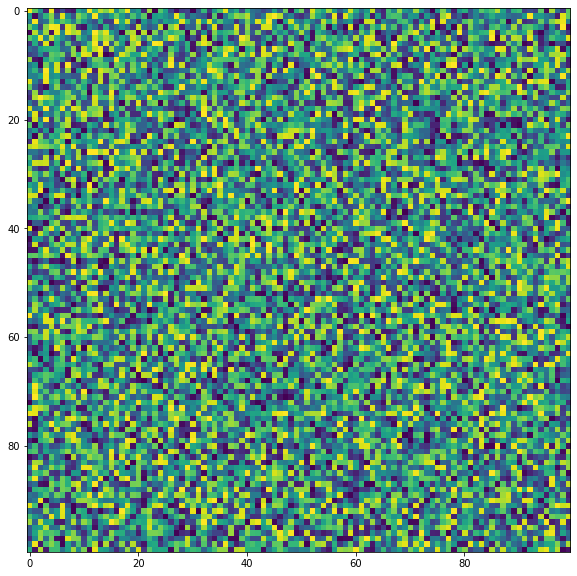

In [23]:
X = np.random.randint(100,size=(100,100)) #create random 2D arrays
Y = np.random.randint(100,size=(100,100))
Z = np.random.randint(100,size=(100,100))

plt.figure(figsize=(10,10)) # set up figure object
plt.imshow(X) # plot array to figure

### 6.2.2 Add colorbar

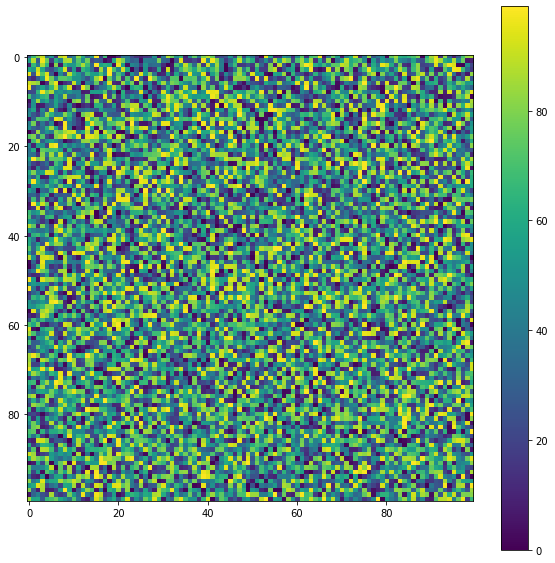

In [24]:
X = np.random.randint(100,size=(100,100))
Y = np.random.randint(100,size=(100,100))
Z = np.random.randint(100,size=(100,100))

plt.figure(figsize=(10,10))
plt.imshow(X)
plt.colorbar() # add colorbar to current figure 

### 6.2.3 Multipanel plots with colorbars

In this example we create a multipanel figure with two 2D images, add colorbars, manipulate the colorbar size and experiment with different color schemes (colormaps/cmaps). Shrinking the colorbar is just one way to adjust the size - take a look at "make axes locatable" for a more advanced approach.

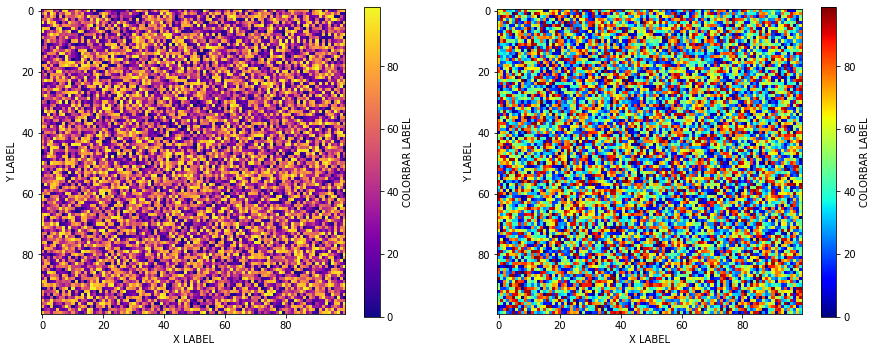

In [25]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,15)) # stateless approach to Figure and Axes objects

cmap='jet'  # define a colormap

im1 = ax1.imshow(X, interpolation='nearest', cmap='plasma') # plot to the relevant Axes object but assign to a
                                                            # variable - this is a "mappable"
im2 = ax2.imshow(Y, interpolation='nearest', cmap = 'jet')

ax1.set_xlabel("X LABEL"),ax1.set_ylabel("Y LABEL") # add axis labels
ax2.set_xlabel("X LABEL"),ax2.set_ylabel("Y LABEL")

fig.colorbar(im1,ax=ax1,shrink=0.38, label="COLORBAR LABEL") # use the "mappable" and the axes object to define a colorbar
fig.colorbar(im2,ax=ax2,shrink=0.38, label="COLORBAR LABEL") # we can also "shrink" the colorbar to the desired dimensions

### 6.2.4 Fine control over Axes object positions

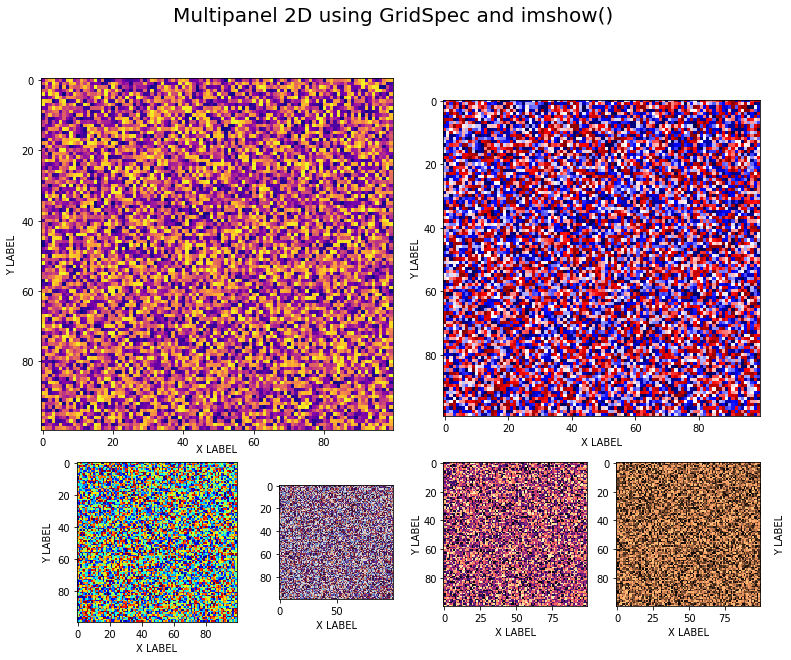

In [26]:

# define figure object and add figure title
fig = plt.figure(figsize=(10,10))
plt.suptitle("Multipanel 2D using GridSpec and imshow()", fontsize=20)

# define grid and update it under two variables
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0.01, right=0.5, wspace=0.05)
gs2 = gridspec.GridSpec(3, 3)
gs2.update(left=0.57, right=1.25, hspace=0.05)

# create 6 Axes objects inside fig
ax1 = plt.subplot(gs1[:-1, :]) # ax1 position and size (index = all columns in gs1, 2 rows from gs1)
ax1.set_ylabel("Y LABEL"), ax1.set_xlabel("X LABEL") # set x and y labels
ax2 = plt.subplot(gs1[-1, :-1]) # ax2 position and size (index = last row in gs1, 2 columns from gs1)
ax2.set_ylabel("Y LABEL"), ax2.set_xlabel("X LABEL")
ax3 = plt.subplot(gs1[-1, -1]) # ax3 position and size (index = last row, last column in gs1)
ax3.set_xlabel("X LABEL")
ax4 = plt.subplot(gs2[:-1, :-1])
ax4.set_ylabel("Y LABEL"), ax4.set_xlabel("X LABEL")
ax5 = plt.subplot(gs2[2, 1])
ax5.set_ylabel("Y LABEL"), ax5.set_xlabel("X LABEL")
ax5.yaxis.set_label_position("right")
ax6 = plt.subplot(gs2[-1, 0])
ax6.set_ylabel("Y LABEL"), ax6.set_xlabel("X LABEL")


# # adjust x and y label positions for clarity using coordinates
ax1.xaxis.set_label_coords(0.5,-0.04)
ax4.yaxis.set_label_coords(-0.07,0.5)
ax5.yaxis.set_label_coords(1.1,0.5)
ax6.yaxis.set_label_coords(-0.15,0.5)

# add data to axes objects
ax1.imshow(X, cmap = 'plasma')
ax2.imshow(Y, cmap = 'jet')
ax3.imshow(Z, cmap = 'twilight')
ax4.imshow(X, cmap = 'seismic')
ax5.imshow(Y, cmap = 'copper')
ax6.imshow(Z, cmap = 'magma')


Text(0.5, 0.98, 'Multipanel 2D plots')

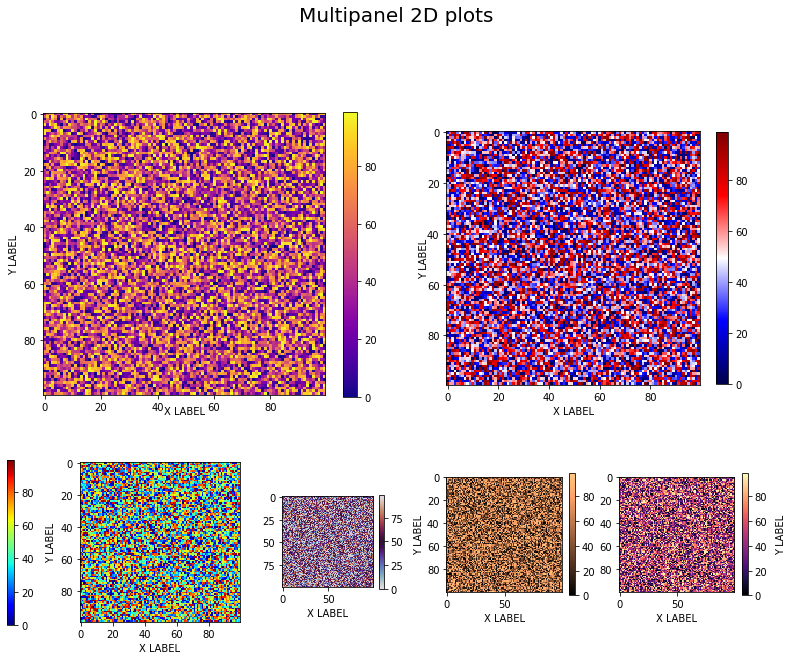

In [27]:

# define figure object and add figure title
fig = plt.figure(figsize=(10,10))

# define grid and update it under two variables
gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0.01, right=0.5, wspace=0.05)
gs2 = gridspec.GridSpec(3, 3)
gs2.update(left=0.57, right=1.25, hspace=0.05)

# create 6 Axes objects inside fig
ax1 = plt.subplot(gs1[:-1, :]) # ax1 position and size (index = all columns in gs1, 2 rows from gs1)
ax1.set_ylabel("Y LABEL"), ax1.set_xlabel("X LABEL") # set x and y labels

ax2 = plt.subplot(gs1[-1, :-1]) # ax2 position and size (index = last row in gs1, 2 columns from gs1)
ax2.set_ylabel("Y LABEL"), ax2.set_xlabel("X LABEL")

ax3 = plt.subplot(gs1[-1, -1]) # ax3 position and size (index = last row, last column in gs1)
ax3.set_xlabel("X LABEL")

ax4 = plt.subplot(gs2[:-1, :-1])
ax4.set_ylabel("Y LABEL"), ax4.set_xlabel("X LABEL")

ax5 = plt.subplot(gs2[-1, 0])
ax5.set_ylabel("Y LABEL"), ax5.set_xlabel("X LABEL")
ax5.yaxis.set_label_position("right")

ax6 = plt.subplot(gs2[2, 1])
ax6.set_ylabel("Y LABEL"), ax6.set_xlabel("X LABEL")


# # adjust x and y label positions for clarity using coordinates
ax1.xaxis.set_label_coords(0.5,-0.04)
ax4.yaxis.set_label_coords(-0.07,0.5)
ax5.yaxis.set_label_coords(-0.28,0.5)
ax6.yaxis.set_label_coords(1.45,0.5)

# add data to axes objects
im1 = ax1.imshow(X, cmap = 'plasma')
im2 = ax2.imshow(Y, cmap = 'jet')
im3 = ax3.imshow(Z, cmap = 'twilight')
im4 = ax4.imshow(X, cmap = 'seismic')
im5 = ax5.imshow(Y, cmap = 'copper')
im6 = ax6.imshow(Z, cmap = 'magma')

# set new axis for im2 colorbar so we can move it over to the left away from axis labels
cbaxes = fig.add_axes([-0.04, 0.12, 0.01, 0.23]) 
# The numbers in the square brackets of add_axes refer to [left, bottom, width, height], where the 
# coordinates are just fractions that go from 0 to 1 of the plotting area. 

#assign colorbars to each axes object
fig.colorbar(im1,ax=ax1,shrink = 0.81)
fig.colorbar(im2,ax=ax2,cax = cbaxes, shrink = 10)
fig.colorbar(im3,ax=ax3,shrink = 0.59)
fig.colorbar(im4,ax=ax4,shrink = 0.7)
fig.colorbar(im5,ax=ax5,shrink = 0.7)
fig.colorbar(im6,ax=ax6,shrink = 0.7)

fig.suptitle("Multipanel 2D plots",fontsize=20)

## 6.3 3D Plotting with mpl.3dplot()

The basic concepts of plotting in three dimensions are not really any different to plotting in two dimensions. We still assign figure and axes objects and call methods on them. The only real difference is that instead of just plotting x and y values we now have a third z dimension to deal with, and we require a new toolkit for plotting in 3D...

In [28]:
from mpl_toolkits.mplot3d import Axes3D

We will only address one example in this session, there are many other 3D plots you can explore independently including 3D line and scatter plots - refer to the documentation here: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots.

<b>NB.</b> For surface plotting it is not sufficient to simply have 3 arrays of values, the x and y values must form a grid over which the z values can be superimposed. This is achieved using np.meshgrid() or by having z as a function of matrix x and matrix y. We take the latter approach below.

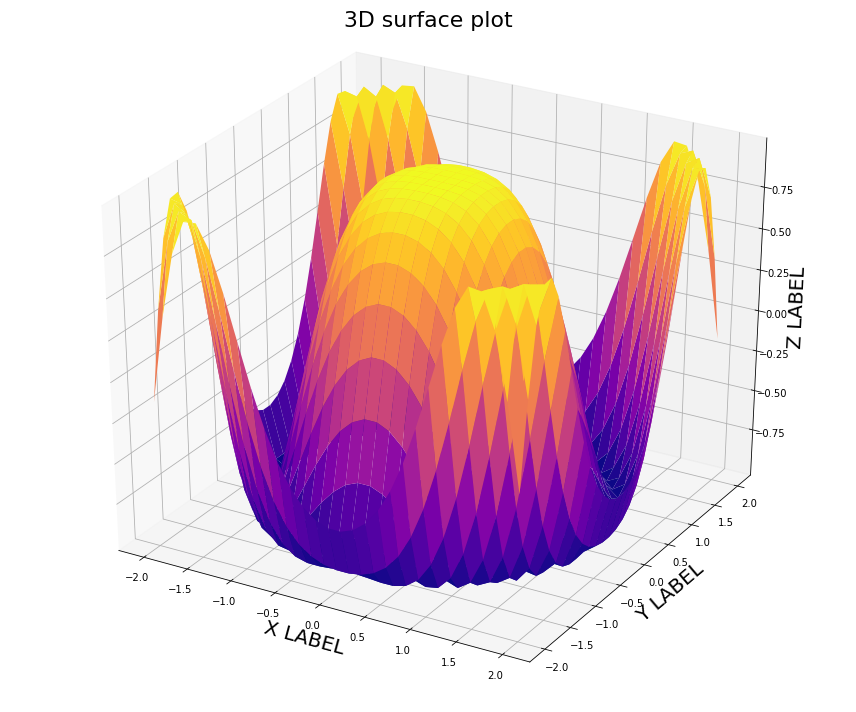

In [29]:
x = np.outer(np.linspace(-2, 2, 30), np.ones(30)) #x is a grid of values linearly spaced between -2 and 2
                                                  # outer() is a multiplication of two vectors that returns a matrix
                                                  # in contrast to the dot product that returns a scalar
y = x.copy().T  # y is the transpose of x
z = np.cos(x ** 2 + y ** 2) # z is a function of x and y, both of which are grids

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap=plt.cm.plasma, rstride=1, cstride=1, linewidth=0)
ax.set_ylabel("Y LABEL", fontsize=20)
ax.set_xlabel("X LABEL", fontsize=20)
ax.set_zlabel("Z LABEL", fontsize=20)
fig.suptitle("3D surface plot", fontsize=22)
plt.tight_layout()

In [30]:
y

array([[-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0.89655172, -0.75862069,
        -0.62068966, -0.48275862, -0.34482759, -0.20689655, -0.06896552,
         0.06896552,  0.20689655,  0.34482759,  0.48275862,  0.62068966,
         0.75862069,  0.89655172,  1.03448276,  1.17241379,  1.31034483,
         1.44827586,  1.5862069 ,  1.72413793,  1.86206897,  2.        ],
       [-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0.89655172, -0.75862069,
        -0.62068966, -0.48275862, -0.34482759, -0.20689655, -0.06896552,
         0.06896552,  0.20689655,  0.34482759,  0.48275862,  0.62068966,
         0.75862069,  0.89655172,  1.03448276,  1.17241379,  1.31034483,
         1.44827586,  1.5862069 ,  1.72413793,  1.86206897,  2.        ],
       [-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0

## 7 Take aways

We have only scratched the surface of vizualisation in Python, and only looked at the fundamental plotting library, Matplotlib. There are many other visualization tools available, including built-ins for Pandas, xarray and other data analysis tools, plotting tools for web applications and animations. However, most of these are built on top of Matplotlib, which is in itself a powerful tool for data visualization that can handle plotting in up to three dimensions and is highly customisable. We have explored stateless and stateful plotting and learned how to manipulate figure, axes and low level objects to create aesthetic and accurate graphics. We will encounter more advanced visualization later in the course.

## 8 Reading

https://matplotlib.org/
<br>
https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut5.html
<br>
https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots
<br>
https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70



## 9 Exercises

In all of the following exercises, think about presenting the data in the most appropriate possible way, including labelling, font sizes, positioning objects and colour schemes as well as simply creating the plot.

In [36]:
# 1) Scatter plot array X against array Y

X = np.random.randint(100,size=50)
Y = np.random.randint(100,size=50)
Z = Y**2

In [37]:
# 2) create multipanel plot where:
# Panel A scatters X, Y (1D)
# Panel B line plots X, Z  (1D)
# Panel C scatters Y, Z  (1D)
# Panel D imshows A  (2D)
# Panel E imshows B  (2D)
# Panel F imshows C  (2D)

A = np.random.randint(100,size=(10,10))
B = np.random.randint(100,size=(10,10))
C = np.random.randint(100,size=(10,10))

In [38]:
# 2) 3D Scatter plot X,Y,Z


In [39]:
# 3) 3D Surface plot P, Q, R

P = np.outer(np.linspace(-100,100,50),np.ones(50))
Q = A.T
R = (A+B)**3